# EASE-Grid Sea Ice Age, Version 2
Short Jupyter notebook describing how to read the Sea Ice Age Dataset.

The dataset documentation and data can be found here: http://nsidc.org/data/nsidc-0611

To begin: I recommend using [`NumPy`](http://www.numpy.org/#) to read gridded
binary data.  It is easy to read the files with just python, but when working with
scientific datasets generally you will want to use numpy as it is much easier.

If you don't have numpy available to you, for example you don't have root
permissions to install, you can install
[`anaconda`](https://store.continuum.io/cshop/anaconda/) in your home
directory.  It comes with NumPy, SciPy, Pandas and a host of useful
scientific python librarys.


To begin, get a sample file:

In [1]:
!wget -qN ftp://sidads.colorado.edu/pub/DATASETS/nsidc0611_seaice_age/data/2012/iceage-2012w19.bin

read file into a numpy array

In [2]:
import numpy as np
filename = 'iceage-2012w19.bin'
data = np.fromfile(filename, dtype=np.uint8)  # read the data as unsigned bytes

see that we loaded all of the data and it matches the size of the expected dataset

In [3]:
print (data.shape)
print 722 * 722

(521284,)
521284


reshape the data to the size of the grid

In [4]:
data = data.reshape(722, 722)

#### Do some validataion to ensure we have loaded the files correctly.

load the matplotlib library:

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


check the values in the file:

In [6]:
print (np.unique(data))


[  0   5  10  15  20  25  30  35  40  45  50 254 255]


plot of the raw data

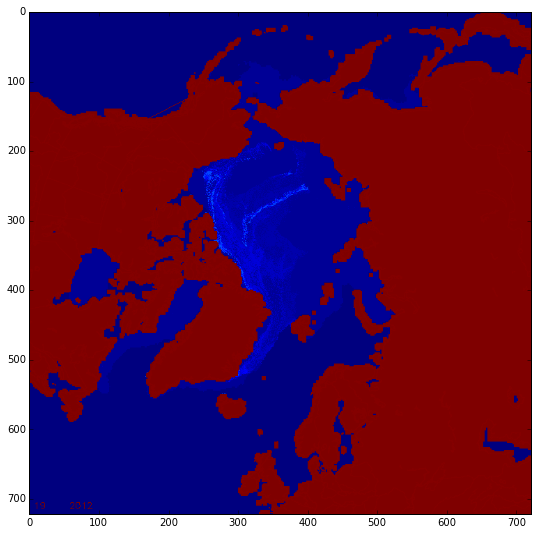

In [7]:
with mpl.rc_context(rc={'figure.figsize': (10,9), 'axes.grid':False}, ):
    plt.imshow(data, cmap="jet")

Add some fancy colors.


In [8]:
ocean = '#78B4FF'
year1 = '#2400F5'
year2 = '#00F6FF'
year3 = '#15FF00'
year4 = '#FFC700'
year5 = 'r'

In [9]:
cmap = mpl.colors.ListedColormap([ocean, year1, year2, year3, year4, year5, 'black', 'brown'])
bounds = [ 0, 5, 10, 15, 20, 25, 254, 255, 256]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

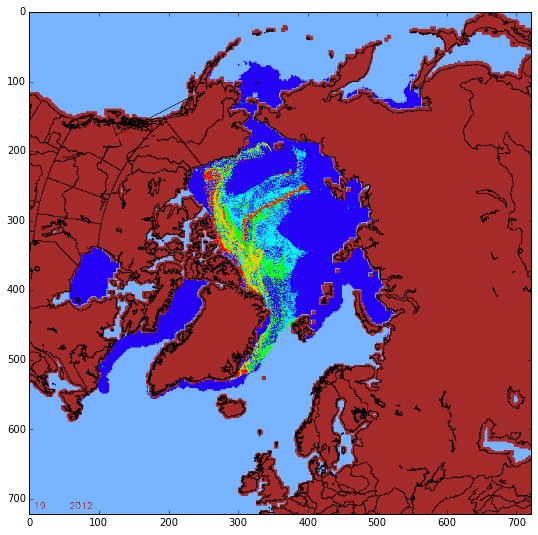

In [10]:
with mpl.rc_context(rc={'figure.figsize': (10,9), 'axes.grid':False}, ):
    plt.imshow(data, cmap=cmap, norm=norm)

clean up your downloaded file

In [11]:
!rm iceage-2012w19.bin